## Processing the raw csv

In [12]:
import pandas as pd
import os
import numpy as np

import ast


input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/raw_csv/standard_exp2.csv')
data = pd.read_csv(input_csv_path)

#Ensure that the 'value' column is a list
data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Take after the 6712th row
#data = data.iloc[3356:]

#Relative distance_y to the target (TX is at 10m from origin, and we recorded the position of the RX)
data['distance_y'] = np.abs(10.0 - data['distance_y'])

data['distance_y'] = data['distance_y'].fillna(method='ffill')

# Remove missing 'value'
data = data.dropna(subset=['value'])

#Add a column for the number of points in each row
data['num_points'] = data['value'].apply(len)


def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [0.0,1.0, 2.0, 3.0]:
    #return sum(1 for value in values if value not in [1.0, 2.0, 3.0])
            error_count += 1
    
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

#Function to check occurrence of signal 3
def check_signal_3(values):
    return 1 if 3.0 in values else 0

#Function to check occurrence of signal 2
def check_signal_2(values):
    return 1 if 2.0 in values else 0

#Function to check occurrence of signal 1
def check_signal_1(values):
    return 1 if 1.0 in values else 0

#Function to check occurrence of signal 0
def check_signal_0(values):
    return 1 if 0.0 in values else 0




# Check if the signal 3 is still present
data['signal_3'] = data['value'].apply(check_signal_3)

# Check if the signal 2 is still present
data['signal_2'] = data['value'].apply(check_signal_2)

# Check if the signal 1 is still present
data['signal_1'] = data['value'].apply(check_signal_1)

# Check if the signal 0 is still present
data['signal_0'] = data['value'].apply(check_signal_0)


specified_distances = np.array([5, 10, 15, 20, 25, 30])

# Assigning each data point to the nearest specified distance_y
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_y'].values).argmin(axis=0)]

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp2_processed.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path 


data.head()




,timestamp,distance_y,value,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
0,1.713718e+09,12.574133,[],0,0,0,0,0,0,15
1,1.713718e+09,12.573794,[],0,0,0,0,0,0,15
2,1.713718e+09,12.573794,[],0,0,0,0,0,0,15
3,1.713718e+09,12.573794,[],0,0,0,0,0,0,15
4,1.713718e+09,12.573794,[],0,0,0,0,0,0,15


## Processing of multiple UAVs


In [24]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp2_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
data = data.iloc[3356:]

#Trim the data after 21940th row
data = data.iloc[:19000]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_standard = data


1411
3457
3501
3499
3500
3632


In [29]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp2_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
data = data.iloc[3787:]

#Trim the data after 21940th row
data = data.iloc[:19000]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive = data

971
3500
3500
3507
3493
4029


In [34]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp1_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

data = data.iloc[6712:]


#8258
#Trim 3500 rows before the 8258th row
data = data.iloc[3500:]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive_exp1 = data


2405
5735
17545
3500
3500
28061


In [1]:
import pandas as pd
import os
import numpy as np

import ast


input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/raw_csv/otsu_multiple_topics.csv')
data = pd.read_csv(input_csv_path)

#Ensure that the 'value' column is a list
data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Relative distance to the target (TX is at 10m from origin, and we recorded the position of the RX)
data['distance_x'] = 10.0 - data['distance_x']

data['distance_x'] = data['distance_x'].fillna(method='ffill')

# Remove missing 'value'
data = data.dropna(subset=['value'])

#Add a column for the number of points in each row
data['num_points'] = data['value'].apply(len)


def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [1.0, 2.0, 3.0]:
    #return sum(1 for value in values if value not in [1.0, 2.0, 3.0])
            error_count += 1
    
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

#Function to check occurrence of signal 3
def check_signal_3(values):
    return 1 if 3.0 in values else 0

#Function to check occurrence of signal 2
def check_signal_2(values):
    return 1 if 2.0 in values else 0

#Function to check occurrence of signal 1
def check_signal_1(values):
    return 1 if 1.0 in values else 0


# Check if the signal 3 is still present
data['signal_3'] = data['value'].apply(check_signal_3)

# Check if the signal 2 is still present
data['signal_2'] = data['value'].apply(check_signal_2)

# Check if the signal 1 is still present
data['signal_1'] = data['value'].apply(check_signal_1)


specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/otsu_multiple_topics_processed.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path 


data.head()

,timestamp,distance_x,value,num_points,error_count,signal_3,signal_2,signal_1,nearest_distance
1,145.308,8.070875,"[9.0, 11.0]",2,2,0,0,0,8
3,145.316,8.070875,"[1.0, 3.0, 5.0, 4.0, 7.0]",5,3,1,0,1,8
5,145.328,8.070875,"[9.0, 11.0]",2,2,0,0,0,8
6,145.336,8.070875,"[1.0, 3.0, 5.0, 4.0, 7.0]",5,3,1,0,1,8
8,145.344,8.070875,"[9.0, 11.0]",2,2,0,0,0,8


## Loading the static measurments datasets

In [10]:
#Loading the data
import pandas as pd
import os
import numpy as np


""" # Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_50_v2_processed.csv')
data_static_50 = pd.read_csv(input_csv_path)
data_static_50.head(5)

# Load the data of threshold 100 
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_100_v2_1_processed.csv')
data_static_100 = pd.read_csv(input_csv_path)

# Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_150_v2_processed.csv')
data_static_150 = pd.read_csv(input_csv_path)

# Load the data of threshold 200
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_200_v2_processed.csv')
data_static_200 = pd.read_csv(input_csv_path)
data_static_200.head(5)

 
#Load the data of adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_kl_adaptive_v2_processed.csv')
data_static_kl_adaptive = pd.read_csv(input_csv_path)
data_static_kl_adaptive.head(5)

#Load the data of otsu adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_otsu_adaptive_v2_processed.csv')
data_static_otsu_adaptive = pd.read_csv(input_csv_path)
data_static_otsu_adaptive.head(5) 
 """



input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp2_processed.csv')
data_otsu_adaptive = pd.read_csv(input_csv_path)
data_otsu_adaptive.head(5)

#Data for the standard
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp2_processed.csv')
data_standard = pd.read_csv(input_csv_path)
data_standard.head(5)





,timestamp,distance_y,value,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
0,1.713718e+09,12.574133,[],0,0,0,0,0,0,15
1,1.713718e+09,12.573794,[],0,0,0,0,0,0,15
2,1.713718e+09,12.573794,[],0,0,0,0,0,0,15
3,1.713718e+09,12.573794,[],0,0,0,0,0,0,15
4,1.713718e+09,12.573794,[],0,0,0,0,0,0,15


In [36]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary = data_otsu_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary['error_rate'] = otsu_adaptive_summary['total_errors'] / otsu_adaptive_summary['total_entries']
otsu_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,4950,4661,0.941616
1,10,8571,6489,0.757088
2,15,5354,659,0.123086
3,20,5460,1330,0.243590
4,25,5677,4752,0.837062
5,30,7115,6573,0.923823


In [35]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_exp1 = data_otsu_adaptive_exp1.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_exp1['error_rate'] = otsu_adaptive_summary_exp1['total_errors'] / otsu_adaptive_summary_exp1['total_entries']
otsu_adaptive_summary_exp1

,nearest_distance,total_entries,total_errors,error_rate
0,5,3639,407,0.111844
1,10,8725,988,0.113238
2,15,26407,2093,0.079259
3,20,5250,309,0.058857
4,25,5305,411,0.077474
5,30,38511,35394,0.919062


In [25]:
#Summarizing the frequency of standard data

standard_summary = data_standard.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary['error_rate'] = standard_summary['total_errors'] / standard_summary['total_entries']
standard_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,2354,1236,0.525064
1,10,5199,621,0.119446
2,15,5320,975,0.183271
3,20,5310,2592,0.488136
4,25,4113,3948,0.959883
5,30,4036,3904,0.967294


## Loading the dynamic measurments datasets

In [22]:



# Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_50_processed.csv')
data_dynamic_50 = pd.read_csv(input_csv_path)
data_dynamic_50.head(5)

# Load the data of threshold 100
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_100_v2_processed.csv')
data_dynamic_100_v2 = pd.read_csv(input_csv_path)
data_dynamic_100_v2.head(5)

#Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_150_processed.csv')
data_dynamic_150 = pd.read_csv(input_csv_path)
data_dynamic_150.head(5)

# Load the data dynamic threshold 200
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_200_processed.csv')
data_dynamic_200 = pd.read_csv(input_csv_path)
data_dynamic_200.head(5)


#Load the data of kl adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/kl_dynamic_adaptive_processed.csv')
data_dynamic_kl_adaptive = pd.read_csv(input_csv_path)
data_dynamic_kl_adaptive.head(5)

#Load the data of otsu adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/otsu_dynamic_adaptive_processed.csv')
data_dynamic_otsu_adaptive = pd.read_csv(input_csv_path)
data_dynamic_otsu_adaptive.head(5)





,timestamp,distance_x,value,is_error,nearest_distance
0,513.392,4.995767,0.0,0,5
1,513.404,4.995767,0.0,0,5
2,513.404,4.995767,2.0,0,5
3,513.404,4.995767,2.0,0,5
4,513.412,4.995767,0.0,0,5


In [24]:
#Summarizing the frequency of errors for threshold 50
th_50_summary_static = data_static_50.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_50_summary_static['error_rate'] = th_50_summary_static['total_errors'] / th_50_summary_static['total_entries']
th_50_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,8603,8041,0.934674
1,8,8503,7861,0.924497
2,11,8518,7736,0.908194
3,14,6897,6698,0.971147
4,17,5824,5596,0.960852
5,20,5442,5303,0.974458


In [27]:
#Summarizing the frequency of errors for threshold 100
th_100_summary_static = data_static_100.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_100_summary_static['error_rate'] = th_100_summary_static['total_errors'] / th_100_summary_static['total_entries']
th_100_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10749,746,0.069402
1,8,10692,1350,0.126263
2,11,10710,1080,0.100840
3,14,8383,4570,0.545151
4,17,7151,3927,0.549154
5,20,6850,5086,0.742482


In [28]:
#Summarizing the frequency of errors for threshold 150
th_150_summary_static = data_static_150.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_150_summary_static['error_rate'] = th_150_summary_static['total_errors'] / th_150_summary_static['total_entries']
th_150_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10749,791,0.073588
1,8,10725,1202,0.112075
2,11,10748,587,0.054615
3,14,8322,5012,0.602259
4,17,7181,3867,0.538504
5,20,6731,4985,0.740603


In [29]:
#Summarizing the frequency of errors for threshold 200
th_200_summary_static = data_static_200.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_200_summary_static['error_rate'] = th_200_summary_static['total_errors'] / th_200_summary_static['total_entries']
th_200_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10698,1333,0.124603
1,8,10701,1386,0.129521
2,11,10739,736,0.068535
3,14,8693,4470,0.514207
4,17,7132,3963,0.555665
5,20,6951,4701,0.676306


In [30]:
#Summarizing the frequency of errors for kl adaptive
kl_adaptive_summary_static = data_static_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_static['error_rate'] = kl_adaptive_summary_static['total_errors'] / kl_adaptive_summary_static['total_entries']
kl_adaptive_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10751,704,0.065482
1,8,10770,634,0.058867
2,11,10730,866,0.080708
3,14,10722,750,0.069950
4,17,10681,3096,0.289860
5,20,10531,9050,0.859368


In [120]:
heading_0_4_summary_static = data.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
heading_0_4_summary_static['error_rate'] = heading_0_4_summary_static['total_errors'] / heading_0_4_summary_static['total_entries']
heading_0_4_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10776,385,0.035728
1,8,9583,1883,0.196494
2,11,7426,3982,0.536224
3,14,7161,3871,0.540567


In [14]:
# Summarizing the frequency of errors for threshold 200
th_200_summary_dynamic = data_dynamic.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_200_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,13218,794,0.060070
1,8,7368,423,0.057410
2,11,7369,400,0.054281
3,14,7354,2934,0.398967
4,17,7362,3763,0.511138
5,20,7452,3809,0.511138


In [15]:
#Summarizing the frequency of errors for adaptive
adaptive_summary = data_static_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,6586,229,0.034771
1,8,6591,208,0.031558
2,11,6582,278,0.042236
3,14,6577,249,0.037859
4,17,6583,1457,0.221328
5,20,6579,3578,0.543852


In [23]:
#Summarizing the frequency of errors for kl adaptive
kl_adaptive_summary = data_dynamic_kl_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
kl_adaptive_summary


,nearest_distance,total_entries,total_errors,error_rate
0,5,10524,344,0.032687
1,8,221,39,0.176471
2,11,13136,359,0.027329
3,14,6958,267,0.038373
4,17,6924,2206,0.318602
5,20,2060,1175,0.570388


In [16]:
#Summarizing the frequency of errors for otsu adaptive
otsu_adaptive_summary = data_static_otsu_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
otsu_adaptive_summary


,nearest_distance,total_entries,total_errors,error_rate
0,5,6552,98,0.014957
1,8,6563,161,0.024531
2,11,6574,63,0.009583
3,14,6563,97,0.014780
4,17,6564,1589,0.242078
5,20,6563,3567,0.543501


In [24]:
#Summarizing the frequency of errors for otsu adaptive
otsu_adaptive_summary_dynamic = data_dynamic_otsu_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
otsu_adaptive_summary_dynamic


,nearest_distance,total_entries,total_errors,error_rate
0,5,4356,105,0.024105
1,8,7345,249,0.033901
2,11,7355,147,0.019986
3,14,7342,187,0.025470
4,17,7354,2425,0.329753
5,20,7201,3941,0.547285


In [17]:
#Create a csv with all summaries
summary_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_dynamic_standard_summaries.csv')
summaries = [th_50_summary_static, th_50_summary_dynamic, th_100_v2_summary_static, th_100_v2_summary_dynamic, th_150_summary_static, th_150_summary_dynamic, th_200_summary_static, th_200_summary_dynamic]
summary = pd.concat(summaries, axis=0)
summary.to_csv(summary_file_path, index=False)

summary_file_path # Return the path to the new CSV and display the first few rows of the cleaned data.

'/home/rivermar/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_dynamic_standard_summaries.csv'

In [31]:
#Summarizing the frequency of errors for otsu adaptive

#Take only the rows after the 6712th row
data_static_otsu_adaptive_i = data_static_otsu_adaptive.iloc[23251:]
otsu_adaptive_summary_static = data_static_otsu_adaptive_i.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_static['error_rate'] = otsu_adaptive_summary_static['total_errors'] / otsu_adaptive_summary_static['total_entries']
otsu_adaptive_summary_static


,nearest_distance,total_entries,total_errors,error_rate
0,5,3252,315,0.096863
1,10,5338,678,0.127014
2,15,5250,368,0.070095
3,20,5250,309,0.058857
4,25,5305,411,0.077474
5,30,38511,35394,0.919062


In [37]:
#Summarizing the frequency of errors for kl adaptive

#Take only the rows after the 6712th row
data_static_kl_adaptive_i = data_static_kl_adaptive.iloc[0:]
kl_adaptive_summary_static = data_static_kl_adaptive_i.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_static['error_rate'] = kl_adaptive_summary_static['total_errors'] / kl_adaptive_summary_static['total_entries']
kl_adaptive_summary_static




,nearest_distance,total_entries,total_errors,error_rate
0,5,5012,2936,0.585794
1,10,5290,485,0.091682
2,15,5282,543,0.102802
3,20,5250,1782,0.339429
4,25,5336,5051,0.946589
5,30,15082,15058,0.998409


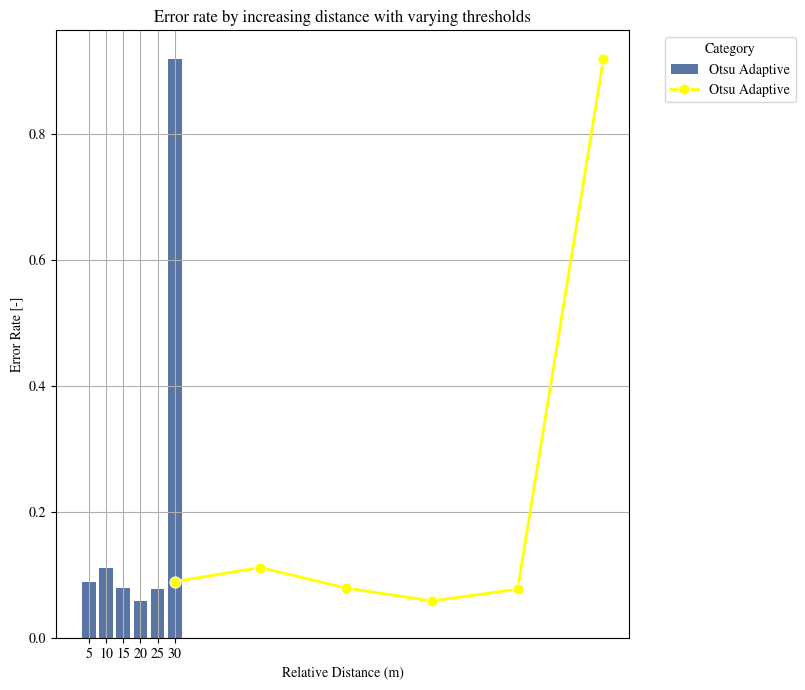

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'



# Add a new column to each DataFrame to label the category before combining
""" th_200_summary_dynamic['category'] = 'Dynamic (Threshold = 200)'
th_100_v2_summary_dynamic['category'] = 'Dynamic (Threshold = 100)'
th_150_summary_dynamic['category'] = 'Dynamic (Threshold = 150)'
th_50_summary_dynamic['category'] = 'Dynamic (Threshold = 50)'
th_200_summary_static['category'] = 'Static (Threshold = 200)'
th_100_v2_summary_static['category'] = 'Static (Threshold = 100)'
th_150_summary_static['category'] = 'Static (Threshold = 150)'
th_50_summary_static['category'] = 'Static (Threshold = 50)'
adaptive_summary['category'] = 'KL-Adaptive' """
otsu_adaptive_summary_static['category'] = 'Otsu Adaptive'
""" kl_adaptive_summary['category'] = 'Dynamic KL-Adaptive'
otsu_adaptive_summary_dynamic['category'] = 'Dynamic Otsu Adaptive' """


#Just otsu adaptive
combined_data = otsu_adaptive_summary_static

""" 
# Combine all the DataFrames into one
combined_data = pd.concat([
    th_200_summary_dynamic,
    th_100_v2_summary_dynamic,
    th_150_summary_dynamic,
    th_50_summary_dynamic,
    th_200_summary_static,
    th_100_v2_summary_static,
    th_150_summary_static,
    th_50_summary_static,
    adaptive_summary,
    otsu_adaptive_summary,
    kl_adaptive_summary,
    otsu_adaptive_summary_dynamic

]) """


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

# Adjusted barplot with hue
sns.barplot(data=combined_data, x='nearest_distance', y='error_rate', hue='category', palette='deep')

plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


""" # Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_dynamic, x='nearest_distance', y='error_rate', color='green', label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', color='pink', label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', color='gray', label='Dynamic (Threshold = 50)')

#Add the static data
sns.barplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_static, x='nearest_distance', y='error_rate', color='orange', label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', color='purple', label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', color='black', label='Static (Threshold = 50)')


plt.title('Error rate by increasing distance (Threshold = 200)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]') """

""" # Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_v2_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='pink', linewidth=2, markersize=8, label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='gray', linewidth=2, markersize=8, label='Dynamic (Threshold = 50)')

#Add the static data
sns.lineplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_v2_summary_static, x='nearest_distance', y='error_rate', marker='o', color='orange', linewidth=2, markersize=8, label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', marker='o', color='purple', linewidth=2, markersize=8, label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', marker='o', color='black', linewidth=2, markersize=8, label='Static (Threshold = 50)')

#Add the adaptive data
sns.lineplot(data=adaptive_summary, x='nearest_distance', y='error_rate', marker='o', color='brown', linewidth=2, markersize=8, label='Adaptive')

#Add the kl adaptive data
sns.lineplot(data=kl_adaptive_summary, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='KL Adaptive') """

#Add the otsu adaptive data

sns.lineplot(data=otsu_adaptive_summary_static, x='nearest_distance', y='error_rate', marker='o', color='yellow', linewidth=2, markersize=8, label='Otsu Adaptive')

""" #Add the otsu adaptive data

sns.lineplot(data=otsu_adaptive_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='blue', linewidth=2, markersize=8, label='Dynamic Otsu Adaptive') """



#Move label to the top left
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
import numpy as np


# Specified relative distances
#specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
#data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Summarizing the frequency of errors for these specified distances
specified_distance_summary = data.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary

# Summarizing the frequency of errors for these specified distances
specified_distance_summary_static = data_static.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6150,3016,0.490407
1,8,6141,3036,0.494382
2,11,6163,2829,0.459030
3,14,6151,4916,0.799220
4,17,6142,5955,0.969554
5,20,6120,5997,0.979902


## Loading data for heading variations

In [2]:
import pandas as pd

# Load the datasets
adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/static_otsu_adaptive_heading_exp_v3_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/static_static_heading_exp_v3_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['distance_x'])
standard_df_clean = standard_df.dropna(subset=['distance_x'])

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_1', 'signal_2', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_1', 'signal_2', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_1', 'signal_2', 'signal_3'])['distance_x'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_1', 'signal_2', 'signal_3'])['distance_x'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard

(signal_1    0.592739
 signal_2    0.592739
 signal_3    1.000000
 dtype: float64,
 signal_1    0.384183
 signal_2    0.392098
 signal_3    1.000000
 dtype: float64,
    signal_1  signal_2  signal_3  distance_x
 0         0         0         1   12.836584
 1         1         1         1    7.199130,
    signal_1  signal_2  signal_3  distance_x
 0         0         0         1   11.701038
 1         0         1         1    7.995741
 2         1         0         1    7.995741
 3         1         1         1    6.037778)

In [5]:
#grouping by distance and calculating the signal presence rate

# Round the distances to the nearest integer for easier comparison
adaptive_df['rounded_distance'] = adaptive_df['distance_x'].round()

# Group by the rounded distance and calculate the mean for signal presence columns
kl_signal_presence_by_distance = adaptive_df.groupby('rounded_distance')[['signal_1', 'signal_2', 'signal_3']].mean().reset_index()

kl_signal_presence_by_distance.head()

,rounded_distance,signal_1,signal_2,signal_3
0,5.0,1.000000,1.000000,1.0
1,8.0,1.000000,1.000000,1.0
2,11.0,0.370627,0.370627,1.0
3,14.0,0.000000,0.000000,1.0


In [6]:
standard_df['rounded_distance'] = standard_df['distance_x'].round()

standard_signal_presence_by_distance = standard_df.groupby('rounded_distance')[['signal_1', 'signal_2', 'signal_3']].mean().reset_index()

standard_signal_presence_by_distance.head()

,rounded_distance,signal_1,signal_2,signal_3
0,5.0,1.000000,1.00000,1.0
1,8.0,0.536091,0.56774,1.0
2,11.0,0.000000,0.00000,1.0
3,14.0,0.000000,0.00000,1.0


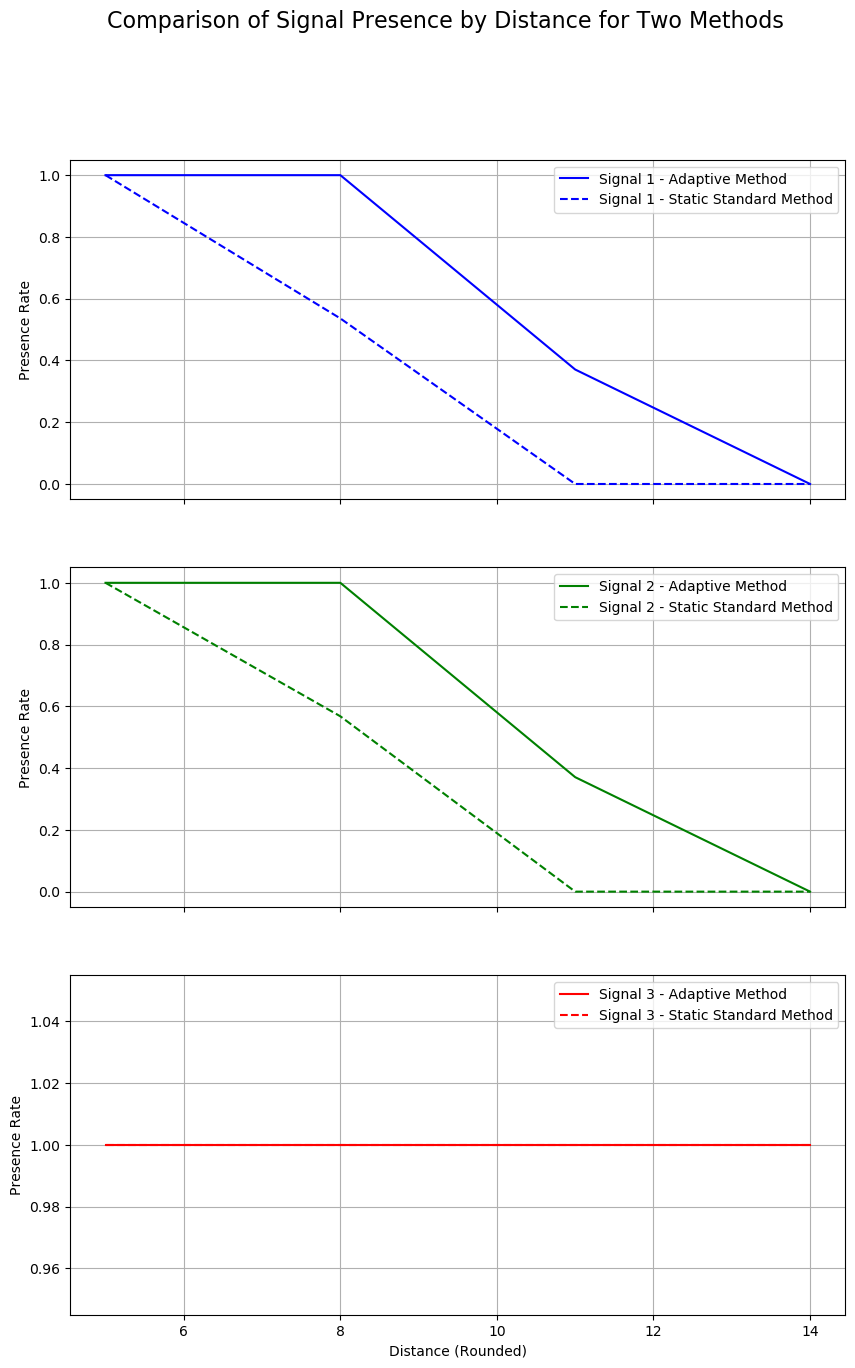

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting area
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Comparison of Signal Presence by Distance for Two Methods', fontsize=16)

# Plot settings
signals = ['signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red']
labels = ['Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Adaptive Method', 'Static Standard Method']

# Plotting the signal presence for each signal
for i, signal in enumerate(signals):
    # Convert data to numpy arrays
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    # Plot data
    axes[i].plot(x_kl, y_kl, color=colors[i], label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_standard, y_standard, '--', color=colors[i], label=f'{labels[i]} - {method_names[1]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (Rounded)')

plt.show()

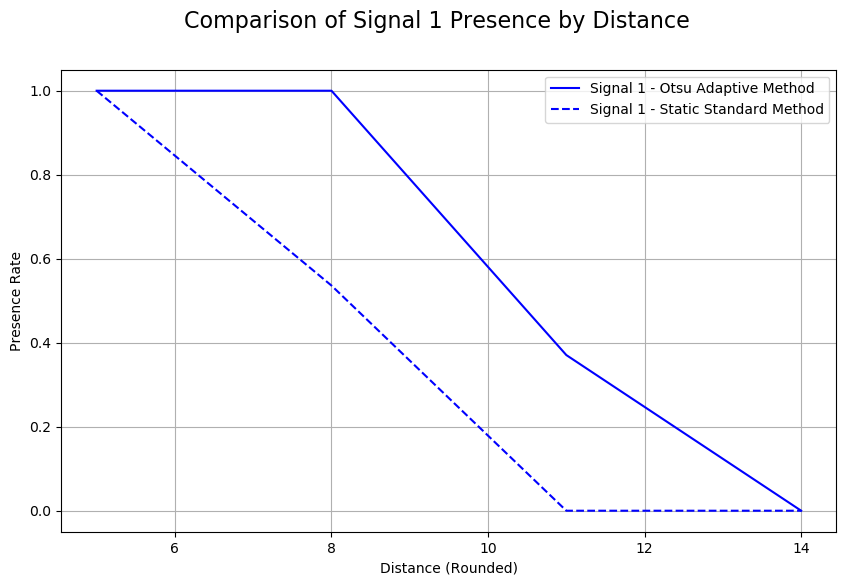

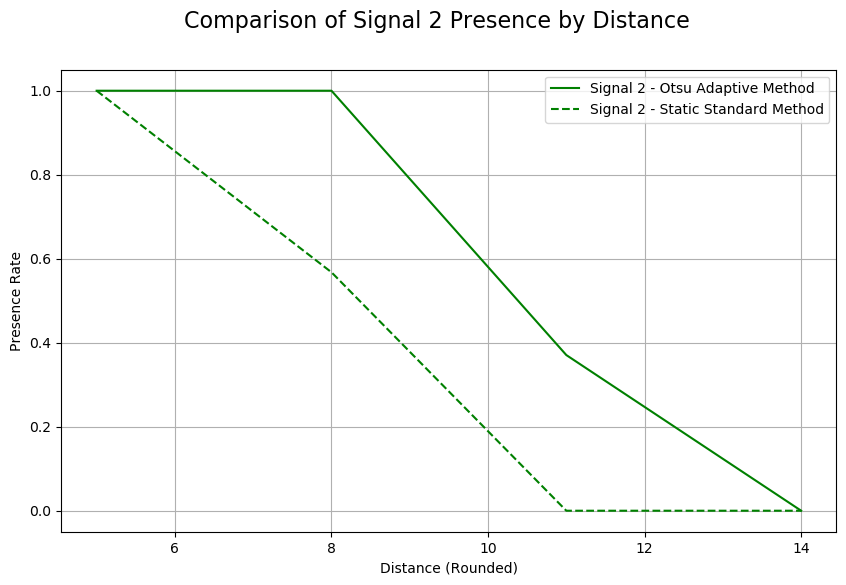

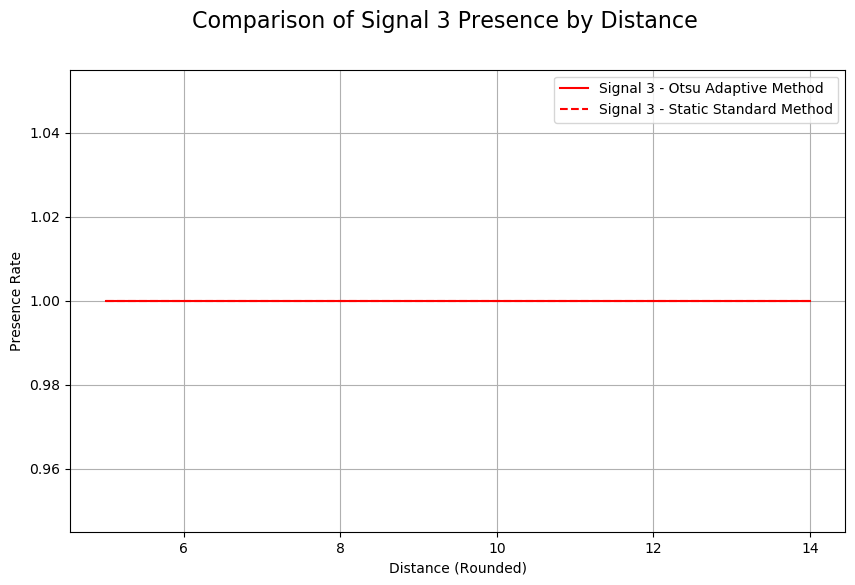

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Signals, colors, labels, and methods names setup
signals = ['signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red']
labels = ['Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Otsu Adaptive Method', 'Static Standard Method']

# Iterate through each signal to create individual plots
for index, signal in enumerate(signals):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    fig.suptitle(f'Comparison of {labels[index]} Presence by Distance', fontsize=16)
    
    # Convert data to numpy arrays
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    # Plotting data for KL Adaptive Method and Static Standard Method
    ax.plot(x_kl, y_kl, color=colors[index], label=f'{labels[index]} - {method_names[0]}')
    ax.plot(x_standard, y_standard, '--', color=colors[index], label=f'{labels[index]} - {method_names[1]}')

    # Setting labels and title
    ax.set_xlabel('Distance (Rounded)')
    ax.set_ylabel('Presence Rate')
    ax.legend(loc='best')
    ax.grid(True)
    
    # Show the plot
    plt.show()

## Plotting overall signal presence


<Figure size 1200x600 with 0 Axes>

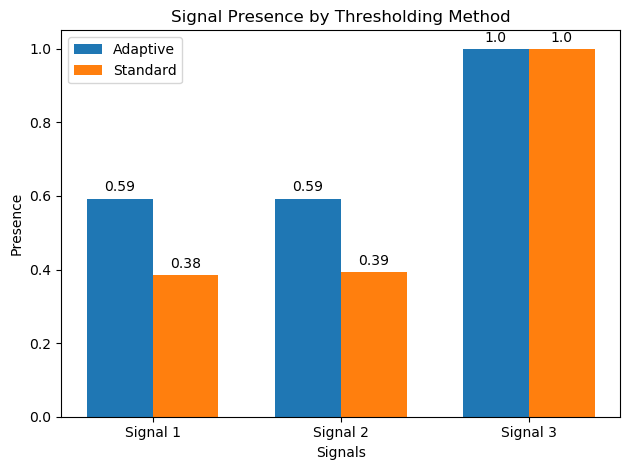

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization 1: Overall Signal Presence Comparison
plt.figure(figsize=(12, 6))

# Data for plotting
labels = ['Signal 1', 'Signal 2', 'Signal 3']
adaptive_means = overall_presence_adaptive.values
standard_means = overall_presence_standard.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, adaptive_means, width, label='Adaptive')
rects2 = ax.bar(x + width/2, standard_means, width, label='Standard')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Signals')
ax.set_ylabel('Presence')
ax.set_title('Signal Presence by Thresholding Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to autolabel the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

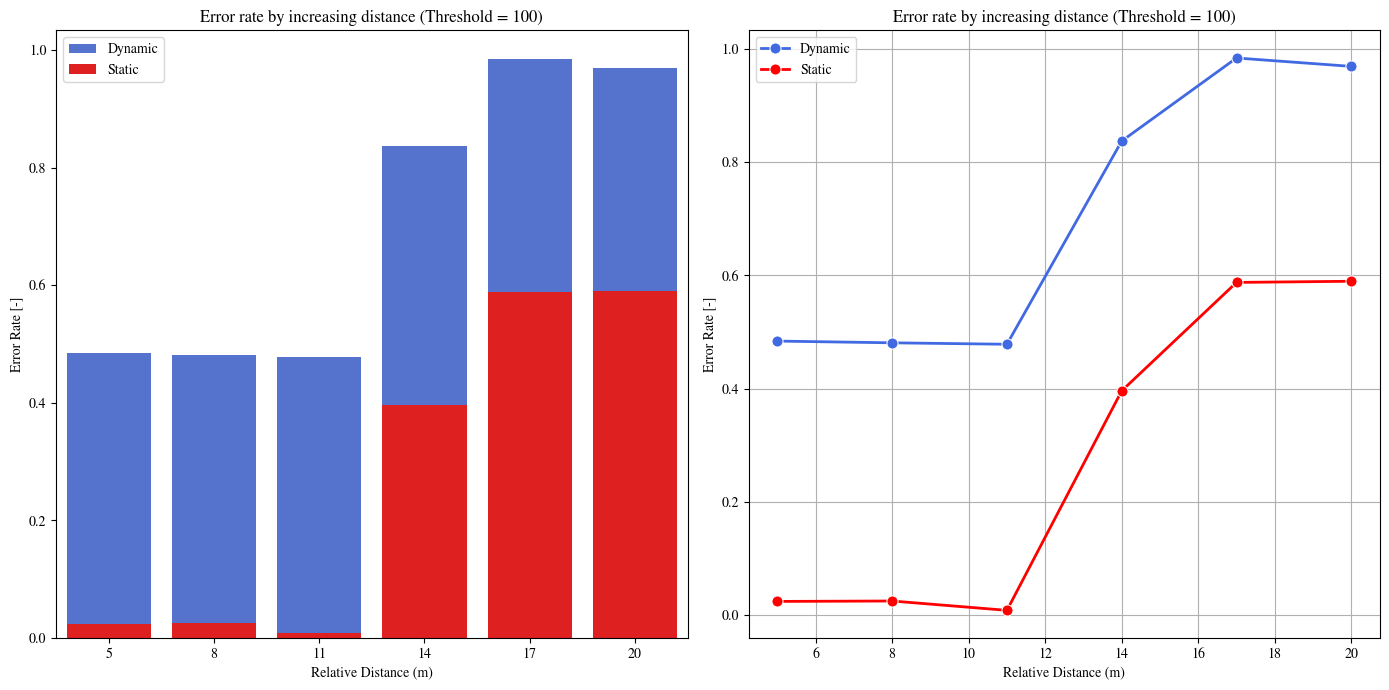

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(14, 7))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic')

#Add the static data
sns.barplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic')

#Add the static data
sns.lineplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

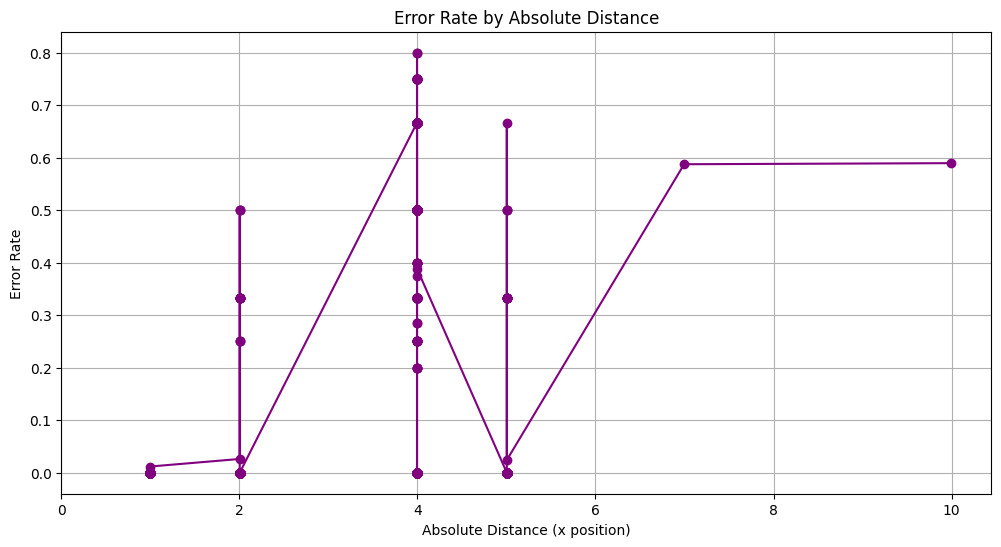

In [51]:
#Make all distances positive
import pandas as pd
import os

import matplotlib.pyplot as plt
data['distance_x'] = data['distance_x'].abs()

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_standard_static_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head(50)  # Return the path to the new CSV and display the first few rows of the cleaned data.



error_rate_by_abs_distance = data.groupby('distance_x')['is_error'].mean().sort_index()
# Plot error rates with absolute distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_abs_distance.index, error_rate_by_abs_distance.values, marker='o', linestyle='-', color='purple')
plt.title('Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

In [47]:
data.head(50)  # Display the first few rows of the cleaned data.

,timestamp,distance_x,value,is_error,adjusted_distance_x
0,54.148,5.004249,0.0,0,10.004249
1,54.148,5.004249,3.0,0,10.004249
2,54.152,5.004249,2.0,0,10.004249
3,54.164,5.004249,2.0,0,10.004249
4,54.168,5.004249,0.0,0,10.004249
5,54.168,5.004249,3.0,0,10.004249
6,54.180,5.004249,0.0,0,10.004249
7,54.180,5.004249,2.0,0,10.004249
8,54.184,5.004249,3.0,0,10.004249
9,54.196,5.004249,2.0,0,10.004249


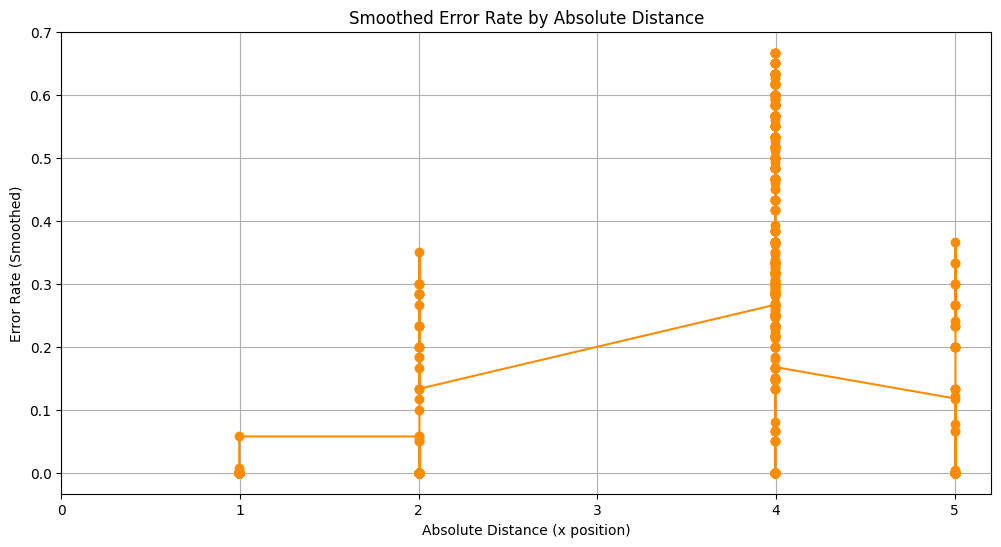

In [45]:
# Apply a moving average to smooth the data and reduce spikes
# Choosing a window size that balances smoothness with retaining the underlying trend
window_size = 5
smoothed_error_rate_abs = error_rate_by_abs_distance.rolling(window=window_size, center=True).mean()

# Plot the smoothed error rates against absolute distances
plt.figure(figsize=(12, 6))
plt.plot(smoothed_error_rate_abs.index, smoothed_error_rate_abs.values, marker='o', linestyle='-', color='darkorange')
plt.title('Smoothed Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate (Smoothed)')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

0.9957509721555614


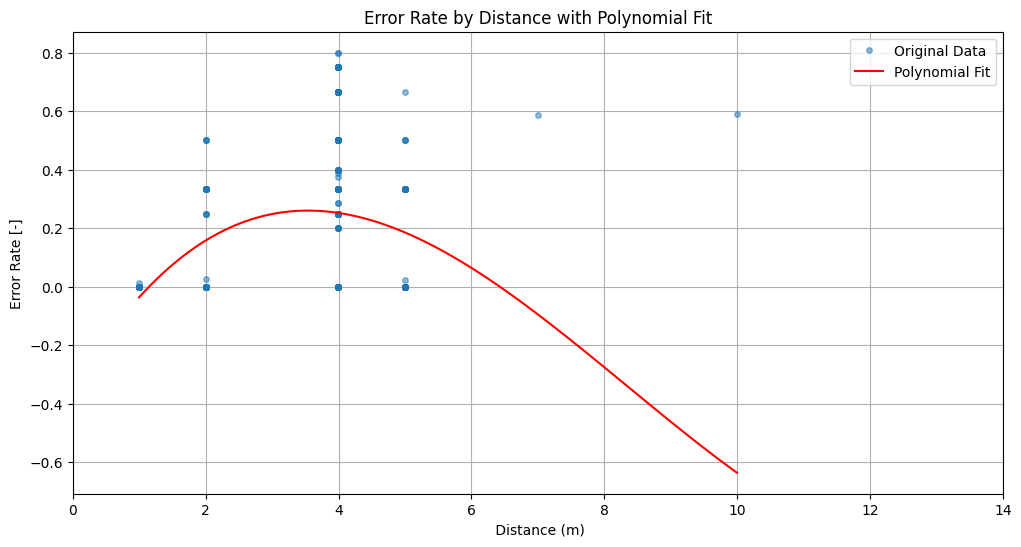

In [62]:
from numpy import polyfit, poly1d
import numpy as np


data['adjusted_distance_x'] = data['distance_x'] + 0
# Recalculate error rates with the adjusted distances
error_rate_by_adjusted_distance = data.groupby('adjusted_distance_x')['is_error'].mean().sort_index()

left_bound = error_rate_by_adjusted_distance.index.min()
print(left_bound)


# Fit a polynomial regression to the adjusted data
coef_adjusted = polyfit(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 3)
poly_adjusted = poly1d(coef_adjusted)

# Generate x and y values for the polynomial fit over the adjusted distances
x_poly_adjusted = np.linspace(error_rate_by_adjusted_distance.index.min(), error_rate_by_adjusted_distance.index.max(), 100)
y_poly_adjusted = poly_adjusted(x_poly_adjusted)

# Plot the original data and the polynomial regression line with adjusted distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 'o', markersize=4, alpha=0.5, label='Original Data')
plt.plot(x_poly_adjusted, y_poly_adjusted, 'r-', label='Polynomial Fit')
plt.title('Error Rate by Distance with Polynomial Fit')
plt.xlabel(' Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend()
plt.grid(True)
plt.xlim(left_bound)  # Adjust the left bound to reflect the distance adjustment
#More descriptive x-limit
plt.xlim(left=0, right=14)
plt.show()

